# Exercise 2

In [16]:
import pandas as pd

In [154]:
def clean_columns(df):
    df.columns = [col.strip() for col in df.columns]
    return df

def clean_values(df):
    df = df.applymap(lambda a: a.strip() if isinstance(a,str) else a)
    return df

def dec_cleaner(func):
    
    def wrapper(*args):
        
        return func(clean_values(clean_columns(*args)))
    
    return wrapper


def countlines(df):
    return pd.Series(len(df))


@dec_cleaner
def sum_arrival_airports(df, n=10):
    return df.groupby('arr_port')['pax'].sum()

@dec_cleaner
def explore_after_cleaning(df):
    return df

def accum_handler(func,chunk_size=1000,breaker=True, path='challenge/bookings.csv'): 
    
    reader = pd.read_csv(path, chunksize=chunk_size, delimiter='^')
    df = pd.DataFrame()
    for chunk in reader:        
        df = pd.concat([df,func(chunk)])
        if breaker:
            reader.close()
            break
    return df

In [115]:
s = accum_handler(sum_arrival_airports,breaker=False, chunk_size=1000000)

/home/xavi/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (7,8,27) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [141]:
summary = s.groupby(s.index).sum().sort_values(by=0,ascending=False)
summary.columns = ['Passengers']
summary['Passengers'] = summary['Passengers'].apply(lambda v: '{:,.0f}'.format(v))
summary.head(10)

,Passengers
LHR,"88,809"
MCO,"70,930"
LAX,"70,530"
LAS,"69,630"
JFK,"66,270"
CDG,"64,490"
BKK,"59,460"
MIA,"58,150"
SFO,"58,000"
DXB,"55,590"


In [143]:
def get_airport_names(df):
    path = 'https://raw.githubusercontent.com/opentraveldata/geobases/public/GeoBases/DataSources/Airports/GeoNames/airports_geonames_only_clean.csv'
    db = pd.read_csv(path, delimiter='^', names=['Code', 'Name', 'Code2', 'Country_code,', 'Country_name', 'lat','lon'])
    return pd.merge(df,db,how='inner',left_index=True,right_on='Code')[['Passengers','Code','Name']].set_index('Code')

In [145]:
get_airport_names(summary).head(10)

,Passengers,Name
Code,,
LHR,"88,809",London Heathrow Airport
MCO,"70,930",Orlando International Airport
LAX,"70,530",Los Angeles International Airport
LAS,"69,630",McCarran International Airport
JFK,"66,270",John F Kennedy International Airport
CDG,"64,490",Paris - Charles-de-Gaulle
BKK,"59,460",Suvarnabhumi
MIA,"58,150",Miami International Airport
SFO,"58,000",San Francisco International Airport


 # Exercise 3

In [184]:
searches_path = 'challenge/searches.csv'
searches = pd.read_csv(searches_path, nrows=1000000, delimiter='^')
clean_search = explore_after_cleaning(searches)
clean_search

/home/xavi/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2013-10-09,06:33:40,FXA,0ae4fec5a2d9c17fb33b32343ef17ef2,AU,ADL,MEL,0,2,ADL,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,537c4fd32d4068dd358b24fbd82bc7e0,0
999996,2013-10-09,14:44:05,MPT,7d8850b517b997d2261756d0c42e412e,TR,IST,LAS,1,2,IST,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0
999997,2013-10-09,05:39:47,MPT,4caf98fe1b209342883e5bbf5a81cd1f,DK,CPH,AGP,0,1,CPH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0
999998,2013-10-09,08:15:30,MPT,eee76fcf858b70383b482882bcb36880,GB,LON,BJS,1,2,LON,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0


In [185]:
iata_targets = {'AGP': 'Málaga',
               'BCN': 'Barcelona',
               'MAD': 'Madrid'}

In [186]:
clean_search['Date'] = pd.to_datetime(clean_search['Date'])
destinations = clean_search.groupby([clean_search['Date'].dt.year,clean_search['Date'].dt.month,'Destination'])['Destination'].count()

In [192]:
destinations

Date  Date  Destination
2013  1     AAE             3
            AAL            18
            AAQ            15
            AAR             9
            ABA             6
                           ..
      12    ZSA             2
            ZSE             2
            ZTF             2
            ZTH            12
            ZYA             2
Name: Destination, Length: 19008, dtype: int64

In [204]:
destinations.name = 'Destination_count'
destinations_rein = destinations.reset_index(level=2)


IndexError: Too many levels: Index has only 2 levels, not 3

In [208]:
#condition = (destinations['Destination']=='AGP') | (destinations['Destination']=='BCN') | (destinations['Destination']=='MAD')
filtered = destinations[(destinations['Destination']=='AGP') | (destinations['Destination']=='BCN') | (destinations['Destination']=='MAD')]

ValueError: x and y must have same first dimension, but have shapes (36,) and (12,)

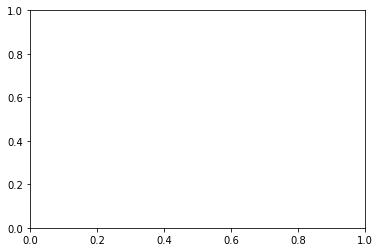

In [222]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
for key in iata_targets:
    ax.plot(filtered.index.values, destinations[destinations['Destination']== key]['Destination_count'])

In [228]:
filtered = filtered.reset_index(level=1)

In [234]:
filtered.columns = ['Month', 'Destination', 'Destination_count']
filtered = filtered.reset_index()


In [235]:
filtered.columns =['Year','Month', 'Destination', 'Destination_count']

In [237]:
filtered['Y-M'] = filtered['Year'].str + '-' + filter['Month'].str
filtered

AttributeError: Can only use .str accessor with string values!